## Data Practicum 1
## Title - US Road Accidents Data Analysis
### Author - Akhila Pulipati

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
from matplotlib.pyplot import plot
import datetime
import warnings
warnings.filterwarnings("ignore")

##  **Data Understanding**
The dataset is taken from Kaggle site. It contains countrywide car accidents record, which covers 49 states of USA. There are about 4.2 million rows and 49 columns in this dataset.

In [6]:
# Loading the dataset from googledrive
df = pd.read_csv('/content/gdrive/My Drive/Kaggle_DS_Project/US_Accidents_Dec20.csv')
print("Shape of the dataset:", df.shape)

Shape of the dataset: (4229394, 49)


In [7]:
# Display the first 5 rows of the dataset
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


The dataset contains 49 columns with  object, float, int and bool datatypes.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4229394 entries, 0 to 4229393
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [9]:
# Display number of null values in each column
df.isnull().sum().sort_values(ascending = False ).head(25)

End_Lat                  2716477
End_Lng                  2716477
Number                   2686191
Precipitation(in)        2065402
Wind_Chill(F)            1895871
TMC                      1512917
Wind_Speed(mph)           479212
Visibility(mi)             98557
Weather_Condition          98282
Humidity(%)                95346
Temperature(F)             89783
Wind_Direction             83496
Pressure(in)               76288
Weather_Timestamp          62553
Airport_Code                8961
Timezone                    4609
Zipcode                     1291
Nautical_Twilight            141
Astronomical_Twilight        141
Civil_Twilight               141
Sunrise_Sunset               141
City                         137
Description                    2
Amenity                        0
Street                         0
dtype: int64

In [10]:
# Calculating Columns which contain missing values
missing_val =[col for col in df.columns if df[col].isnull().sum()>1]

# Print the percentage of missing values 
for val in missing_val:
    print(val,'-',np.round(df[val].isnull().mean(),3),'%')

TMC - 0.358 %
End_Lat - 0.642 %
End_Lng - 0.642 %
Description - 0.0 %
Number - 0.635 %
City - 0.0 %
Zipcode - 0.0 %
Timezone - 0.001 %
Airport_Code - 0.002 %
Weather_Timestamp - 0.015 %
Temperature(F) - 0.021 %
Wind_Chill(F) - 0.448 %
Humidity(%) - 0.023 %
Pressure(in) - 0.018 %
Visibility(mi) - 0.023 %
Wind_Direction - 0.02 %
Wind_Speed(mph) - 0.113 %
Precipitation(in) - 0.488 %
Weather_Condition - 0.023 %
Sunrise_Sunset - 0.0 %
Civil_Twilight - 0.0 %
Nautical_Twilight - 0.0 %
Astronomical_Twilight - 0.0 %


## **Data Preparation**

### Handling missing /null values
The given dataset contains huge amount of missing values and they are 23 columns which contains missing values. Below are the steps of handing these values:

- The missing values for columns - Humidity, Precipitation, TMC, Wind_Chill,Wind_Speed, Visibility, End_Lat, End_Lng, Number are filled with 0 as their is a chance of having zero rain if no rain on that day, and the end latitude and longitude are recorded with 0 for missing records.
- The TMC (Traffic Message Channel)column is a technology of delivering traffic and travel information to motor vehicle drivers. Replaced the column missing values with 0. All these columns are of float datatype.


In [11]:
col_list = ['Humidity(%)','Precipitation(in)', 'TMC','Wind_Chill(F)','Wind_Speed(mph)','Visibility(mi)', 'End_Lat', 'End_Lng', 'Number']
for i in col_list:
    df[i] = df[i].fillna(0)

- Filling the Temparature and Pressure columns with the average values in that column.

In [12]:
col_list = ['Temperature(F)','Pressure(in)']
for i in col_list:
    df[i]=df[i].fillna(df[i].mean())

- Next, dropped the null values for the below columns as it contains less than 5% of the data.

In [13]:
df = df.dropna(subset=['Airport_Code','Zipcode','Nautical_Twilight','Astronomical_Twilight', 'Sunrise_Sunset','Civil_Twilight','City', 'Weather_Timestamp'])

- Dropped the Turning Loop column as it has only one value 'False', which means their are no turning loop near to the accident. 

In [14]:
df = df.drop('Turning_Loop', axis = 1)

- Next, filled the 'weather_condition' and 'wind_direction' columns missing values with mode value and the 'description' column has only two missing values, filled these values with 'unknown'.

In [15]:
df["Weather_Condition"].fillna(df["Weather_Condition"].mode()[0], inplace = True)
df["Wind_Direction"].fillna(df["Wind_Direction"].mode()[0], inplace = True)
df.Description.fillna('Unknown', inplace= True)

In [16]:
# check if they are any missing values
df.isnull().sum().sum()

0

In [18]:
# Export the clean data togdrive
#df.to_csv('/content/gdrive/My Drive/Kaggle_DS_Project/US_Accidents_cleandf.csv',index=False)

## **Data Visualization**

### Source of information
The 'Source' column represents the API which reported the accident. Below figure shows that most of the accidents are reported by MapQuest and second by Bing.

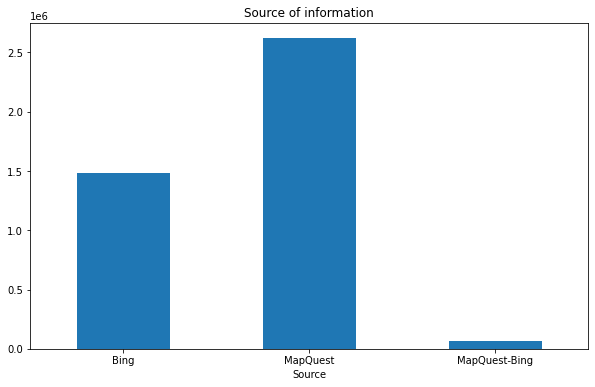

In [19]:
plt.figure(figsize = (10,6))
df.groupby("Source").size().plot.bar()
plt.xticks(rotation = 360)
plt.title("Source of information")
plt.show()

In [20]:
df['Source'].value_counts()

MapQuest         2620438
Bing             1482662
MapQuest-Bing      63602
Name: Source, dtype: int64

### Accidents Severity
The 'Severity' column gives the severity of an accident which are categorised from 1-4. The plot shows that most of the accidents are with severity 2 followed by 3. There are very few accidents with low severity 1. 

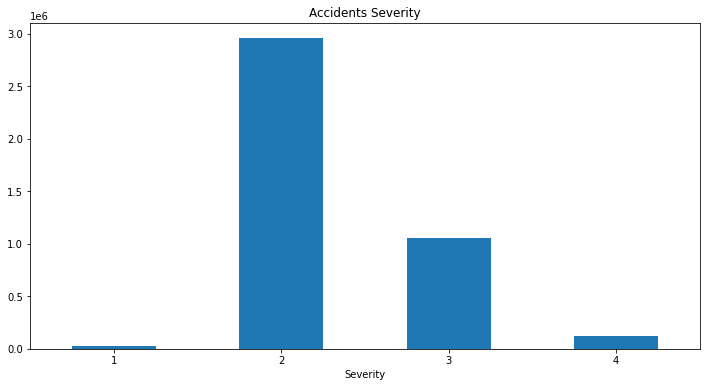

In [21]:
plt.figure(figsize = (12,6))
df.groupby("Severity").size().plot.bar()
plt.xticks(rotation = 360)
plt.title("Accidents Severity")
plt.show()

Accidents across the states

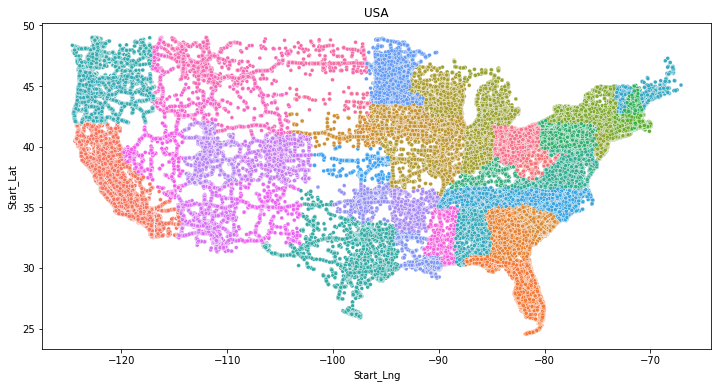

In [22]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = "Start_Lng", 
                y = "Start_Lat", 
                data = df, 
                hue = "State", 
                legend = False, 
                s = 15)

plt.title("USA")
plt.show()

### Accidents across states
The below plot shows the number of accidents across different states. It appears that most of the accidents had occured in California, Texas and Florida.  

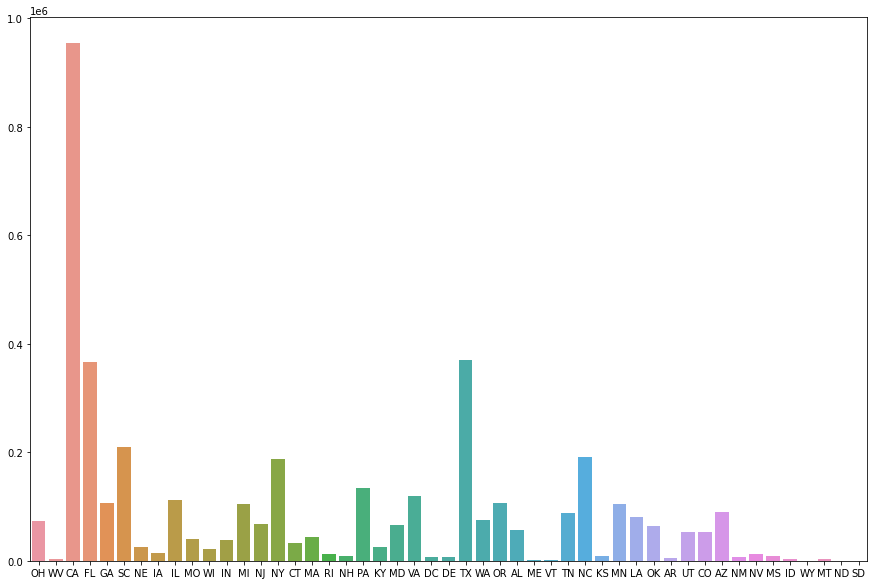

In [23]:
states = df.State.unique()
state_count=[]
for i in states:
    state_count.append(df[df['State']==i].count()['ID'])
plt.figure(figsize=(15,10))
sns.barplot(states, state_count)

Here are the top 5 states with the most number of accidents.

In [24]:
df_state=df.groupby(['State'], as_index=False).count().iloc[:,:2]
df_state=df_state.rename(columns={"ID":"Accidents_ct"})
# Display number of accidents in sort order
df_state.sort_values(by=['Accidents_ct'], ascending=False, inplace=True)
df_state.head()

,State,Accidents_ct
3,CA,954397
41,TX,371027
8,FL,366566
38,SC,209370
25,NC,191739


### Top 10 Weather conditions for accidents
Below are the top weather conditions during the accidents. Most of the accidents occured during the Fair weather conditions. This shows that people drive carefully during bad weather condition.

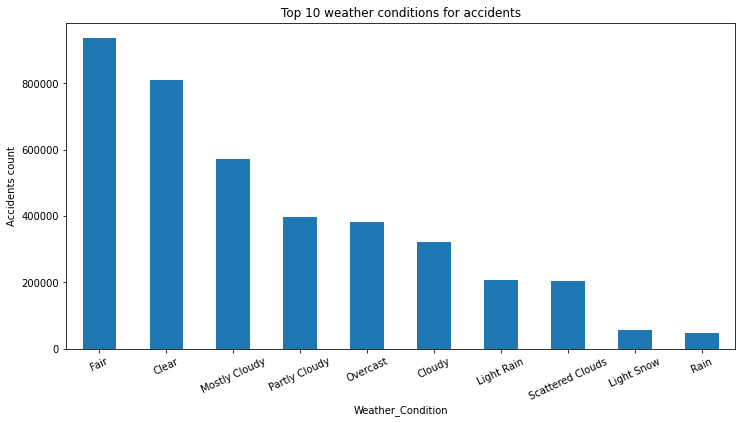

In [25]:
plt.figure(figsize = (12,6))
df.groupby("Weather_Condition").size().sort_values(ascending = False).head(10).plot.bar()
plt.xticks(rotation = 25)
plt.ylabel("Accidents count")
plt.title("Top 10 weather conditions for accidents")
plt.show()

### Top 5 cities of accidents
The top five cities with highest count of accidents are Houston, Los Angeles, Chariotte, Dallas and Austin.

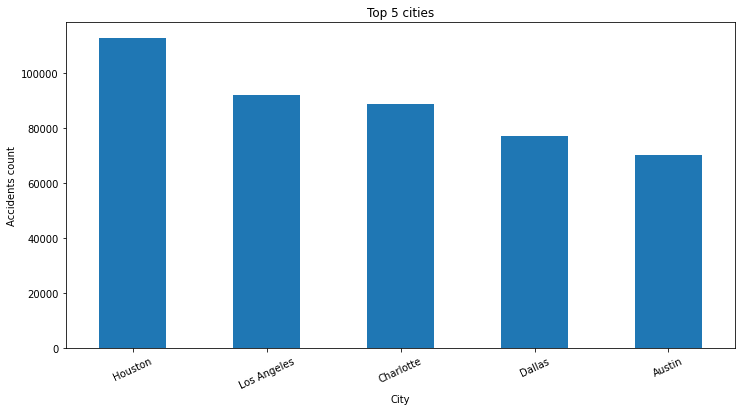

In [26]:
plt.figure(figsize = (12,6))
df.groupby("City").size().sort_values(ascending = False).head(5).plot.bar()
plt.xticks(rotation = 25)
plt.ylabel("Accidents count")
plt.title("Top 5 cities")
plt.show()

### Accidents occuring zones

In [27]:
boolCol = [col for col in df.columns if df[col].dtype ==np.dtype('bool')]
df_bool = df[boolCol]
not_one_hot = df_bool[df_bool.sum(axis=1) > 1]
print('There are {} non one hot metadata rows, which are {:.1f}% of the data'.format(len(not_one_hot),100*len(not_one_hot)/len(df)))

There are 345461 non one hot metadata rows, which are 8.3% of the data


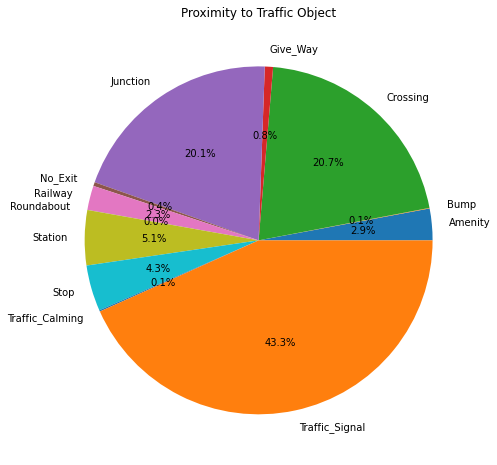

In [28]:
bools = df_bool.sum(axis=0)
bools.plot.pie(figsize=(18,8), autopct='%1.1f%%')
plt.ylabel('')
plt.title('Proximity to Traffic Object');

Getting the Year, Month and Hour of accident occured from the 'Start_Time' column

In [17]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"])
df["Year"] = df["Start_Time"].dt.year
df["Month"] = df["Start_Time"].dt.month
df["Hour"] = df["Start_Time"].dt.hour

df['DayOfWeekNum'] = df['Start_Time'].dt.dayofweek
df['DayOfWeek'] = df['Start_Time'].dt.day_name()
df['MonthDayNum'] = df['Start_Time'].dt.day
df['HourOfDay'] = df['Start_Time'].dt.hour

### Accidents per year (2016-2020)

This depects the number of accidents occured in a particular year. The values shows that accidents count has been increasing year by year.

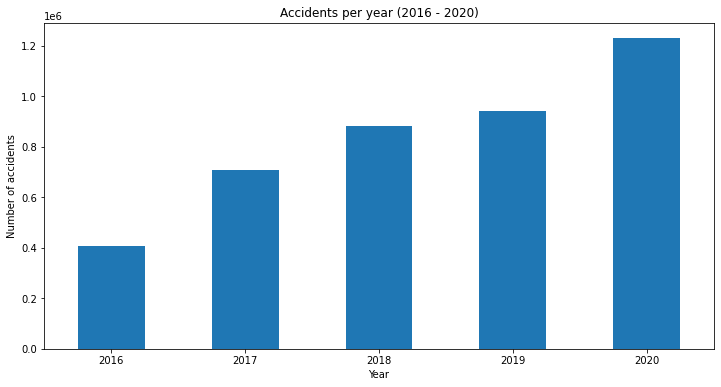

In [30]:
plt.figure(figsize = (12,6))
df.groupby("Year").size().plot.bar()
plt.xticks(rotation = 360)
plt.ylabel("Number of accidents")
plt.title("Accidents per year (2016 - 2020)")
plt.show()

In [31]:
df['Year'].value_counts()

2020    1229018
2019     942049
2018     880249
2017     708075
2016     407311
Name: Year, dtype: int64

### Accidents per month
The graph shows that the accidents count is gradually increasing in the second half of the year and comparatively less number of accidents in the month of July.

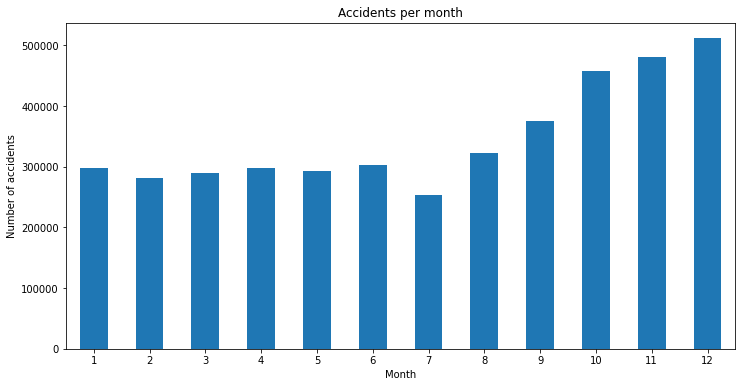

In [32]:
plt.figure(figsize = (12,6))
df.groupby("Month").size().plot.bar()
plt.xticks(rotation = 360)
plt.ylabel("Number of accidents")
plt.title("Accidents per month")
plt.show()

### Accidents per hour
Most of the accidents occured during rush hours i.e. 7am- 8 am and 4pm -5 pm. 

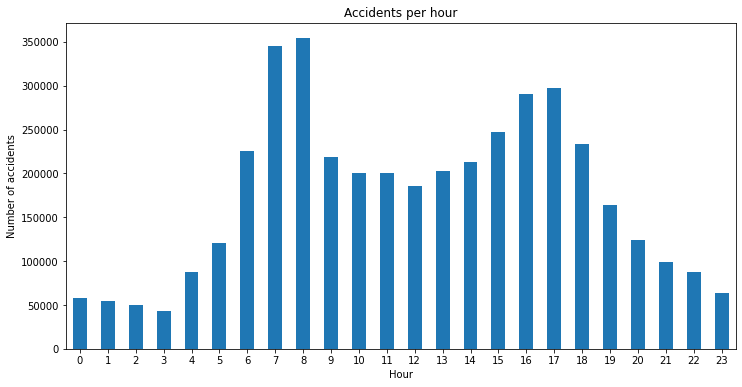

In [33]:
plt.figure(figsize = (12,6))
df.groupby("Hour").size().plot.bar()
plt.xticks(rotation = 360)
plt.ylabel("Number of accidents")
plt.title("Accidents per hour")
plt.show()

### Accidents occured on Days of Week
Most of the accidents occured during the weekdays and less on weekends. It might be because of more traffic on weekdays

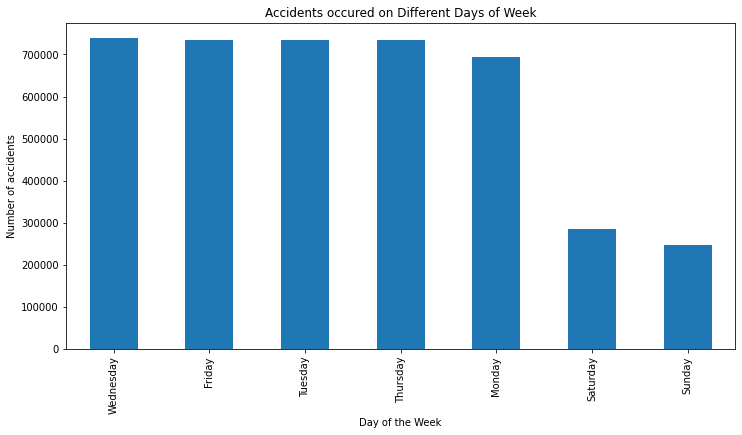

In [34]:
plt.subplots(figsize=(12,6))
df['DayOfWeek'].value_counts(ascending=False).plot.bar()
plt.xlabel('Day of the Week')
plt.ylabel('Number of accidents')
plt.title('Accidents occured on Different Days of Week')
plt.ioff()

### Day of Week Pie chart 

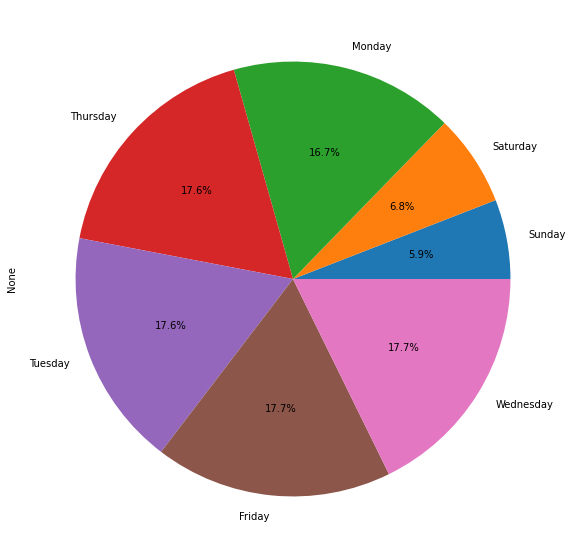

In [35]:
plt.figure(figsize=(16,10))
df.groupby('DayOfWeek') \
        .size() \
        .sort_values(ascending = True) \
        .iloc[:7] \
        .plot.pie(autopct='%1.1f%%')
plt.ioff()

### Accident Count on different Timezones
The dataset contains four different Timezones. The highest count of accidents occured in Eastern followed by Pacific, Central and Mountain.

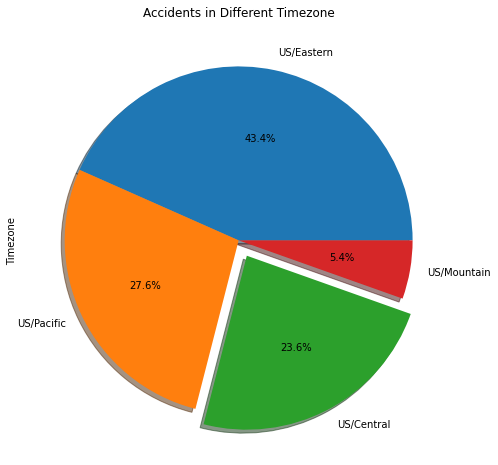

In [36]:
plt.figure(figsize=(18,8))
df['Timezone'].value_counts().plot.pie(explode=[0,0,0.1,0],autopct='%1.1f%%',shadow=True)
plt.title('Accidents in Different Timezone')
plt.show()

Most of the accidents occured in Day time

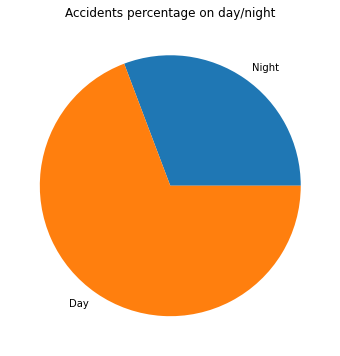

In [37]:
plt.figure(figsize=(16,10))
df.groupby('Sunrise_Sunset') \
        .size() \
        .sort_values(ascending = True) \
        .plot.pie(figsize=(10,6))
plt.ylabel('')
plt.title('Accidents percentage on day/night')
plt.ioff()

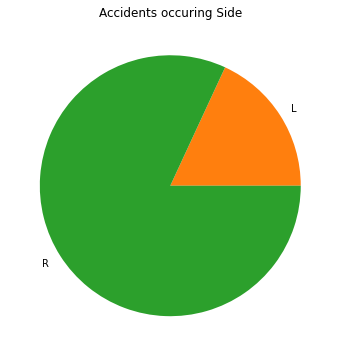

In [61]:
plt.figure(figsize=(16,10))
df.groupby('Side') \
        .size() \
        .sort_values(ascending = True) \
        .plot.pie(figsize=(10,6))
plt.ylabel('')
plt.title('Accidents occuring Side')
plt.ioff()

### States vs Severity 
High severity accidents occured in Wyoming (WY) state and Low severity in North Dakota (ND) state.

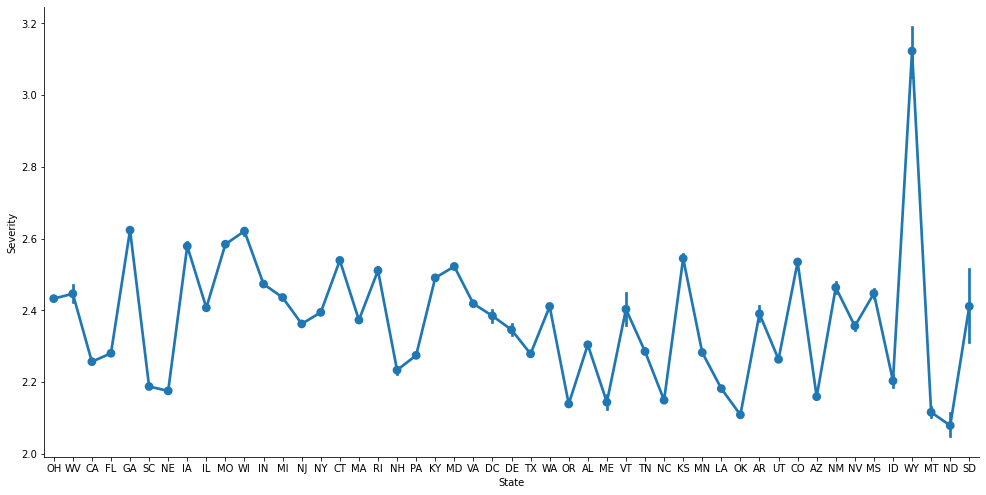

In [39]:
sns.factorplot('State','Severity',data=df)
fig=plt.gcf()
fig.set_size_inches(15,7)
plt.show()

### **Correlation Plot**

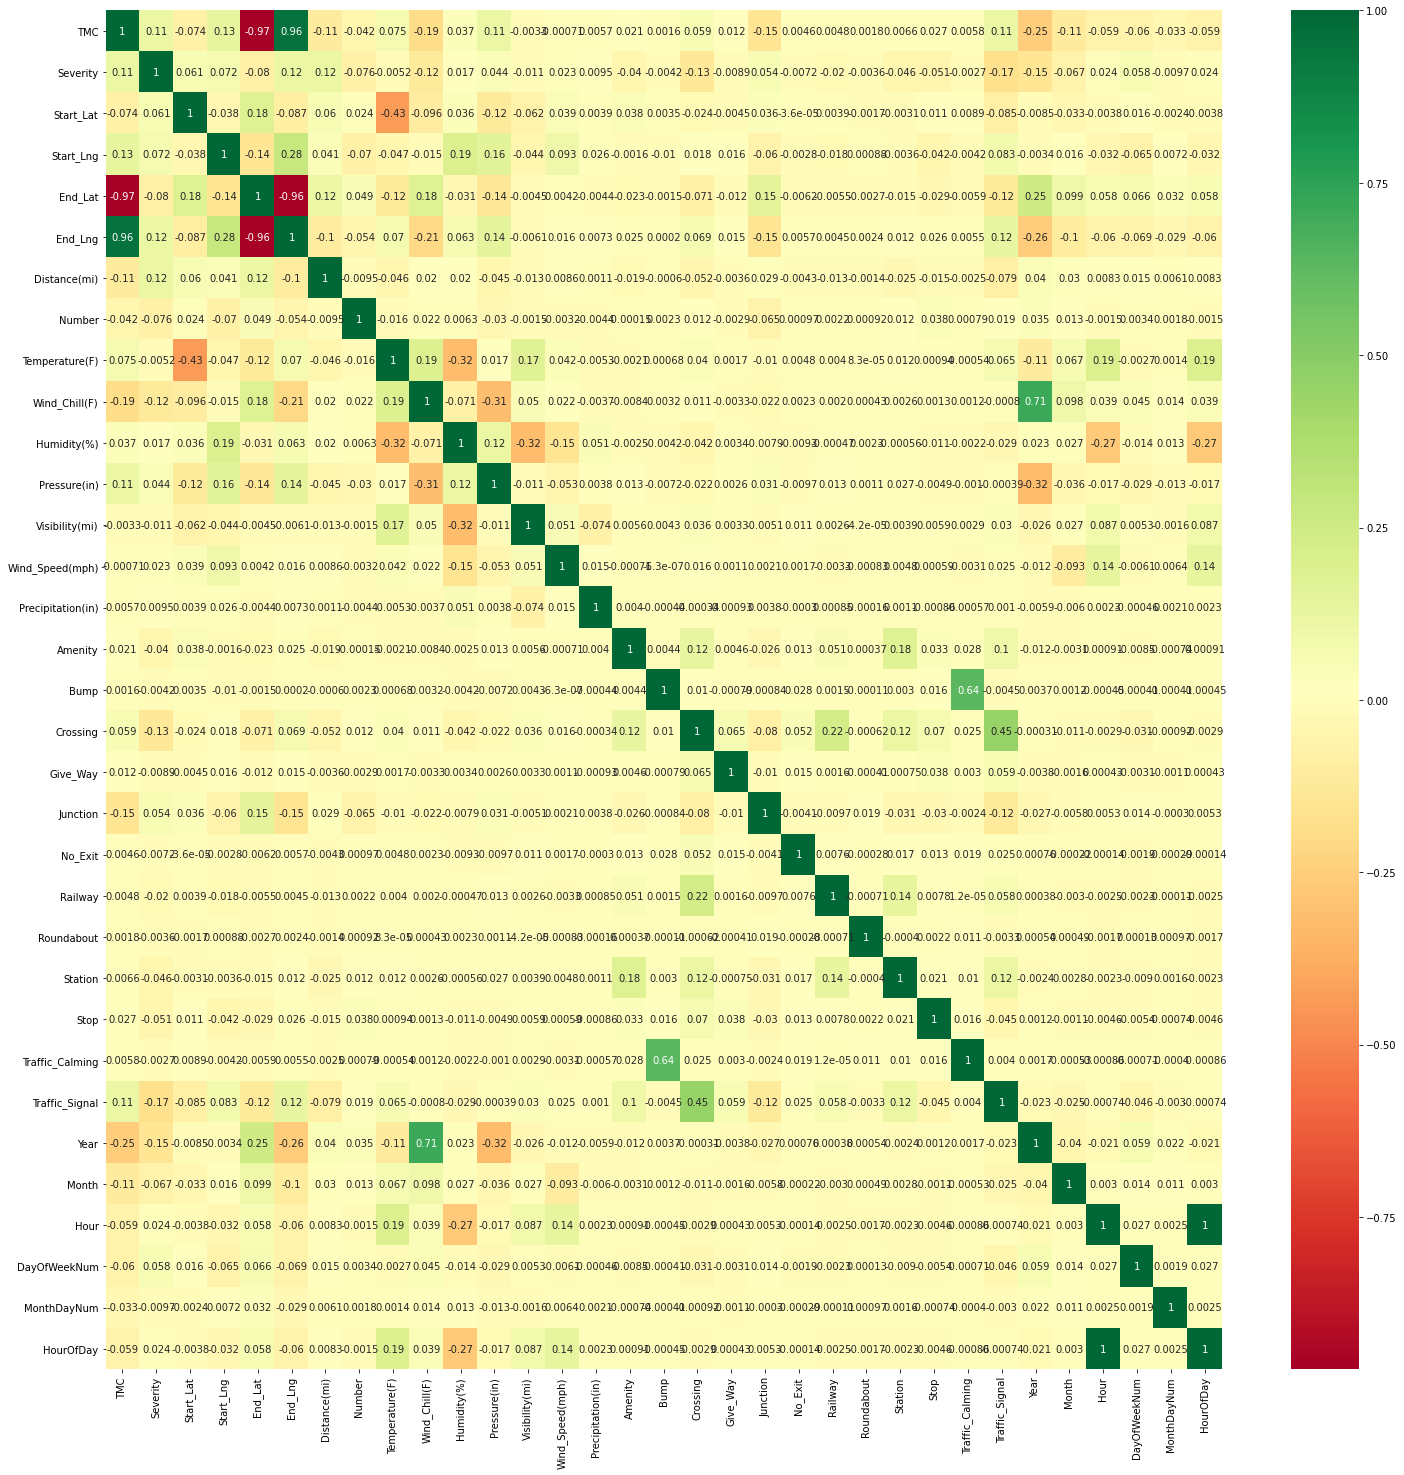

In [40]:
import seaborn as sns
correlation = df.corr()
top_corr_features = correlation.index
plt.figure(figsize=(25,25))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Top Correlated features are:

In [41]:
top_corr_features

Index(['TMC', 'Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Number', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Year', 'Month', 'Hour',
       'DayOfWeekNum', 'MonthDayNum', 'HourOfDay'],
      dtype='object')

In [42]:
# Features correlated with target varible
correlation_target=abs(correlation['Severity'])
print(correlation_target)

TMC                  0.112704
Severity             1.000000
Start_Lat            0.060535
Start_Lng            0.071973
End_Lat              0.080398
End_Lng              0.116694
Distance(mi)         0.121988
Number               0.076270
Temperature(F)       0.005199
Wind_Chill(F)        0.119936
Humidity(%)          0.016515
Pressure(in)         0.043870
Visibility(mi)       0.011180
Wind_Speed(mph)      0.023280
Precipitation(in)    0.009455
Amenity              0.039629
Bump                 0.004168
Crossing             0.130477
Give_Way             0.008947
Junction             0.054351
No_Exit              0.007190
Railway              0.020098
Roundabout           0.003571
Station              0.045647
Stop                 0.050697
Traffic_Calming      0.002707
Traffic_Signal       0.170428
Year                 0.146676
Month                0.066883
Hour                 0.024340
DayOfWeekNum         0.057814
MonthDayNum          0.009666
HourOfDay            0.024340
Name: Seve

## Feature Selection

In [18]:
features  = ['TMC', 'Severity','Start_Lat','Start_Lng','End_Lat','End_Lng','Distance(mi)', 'Timezone','Number','Temperature(F)',
             'Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)','Amenity', 'Bump','Crossing',
             'Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Year','Month','Hour','DayOfWeekNum', 'MonthDayNum','HourOfDay']

In [19]:
df1 = df[features].copy()

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4166702 entries, 0 to 4229393
Data columns (total 34 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TMC                float64
 1   Severity           int64  
 2   Start_Lat          float64
 3   Start_Lng          float64
 4   End_Lat            float64
 5   End_Lng            float64
 6   Distance(mi)       float64
 7   Timezone           object 
 8   Number             float64
 9   Temperature(F)     float64
 10  Wind_Chill(F)      float64
 11  Humidity(%)        float64
 12  Pressure(in)       float64
 13  Visibility(mi)     float64
 14  Wind_Speed(mph)    float64
 15  Precipitation(in)  float64
 16  Amenity            bool   
 17  Bump               bool   
 18  Crossing           bool   
 19  Give_Way           bool   
 20  Junction           bool   
 21  No_Exit            bool   
 22  Railway            bool   
 23  Roundabout         bool   
 24  Station            bool   
 25  Stop              

In [21]:
# Selecting Mountain Standard timezone 
df_time = df1.loc[df1.Timezone=='US/Mountain'].copy()
df_time.drop('Timezone',axis=1, inplace=True)
df_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226417 entries, 266590 to 4229205
Data columns (total 33 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   TMC                226417 non-null  float64
 1   Severity           226417 non-null  int64  
 2   Start_Lat          226417 non-null  float64
 3   Start_Lng          226417 non-null  float64
 4   End_Lat            226417 non-null  float64
 5   End_Lng            226417 non-null  float64
 6   Distance(mi)       226417 non-null  float64
 7   Number             226417 non-null  float64
 8   Temperature(F)     226417 non-null  float64
 9   Wind_Chill(F)      226417 non-null  float64
 10  Humidity(%)        226417 non-null  float64
 11  Pressure(in)       226417 non-null  float64
 12  Visibility(mi)     226417 non-null  float64
 13  Wind_Speed(mph)    226417 non-null  float64
 14  Precipitation(in)  226417 non-null  float64
 15  Amenity            226417 non-null  bool   
 

In [22]:
df_time.head()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Year,Month,Hour,DayOfWeekNum,MonthDayNum,HourOfDay
266590,222.0,2,30.199951,-98.357101,0.0,0.0,0.01,0.0,63.5,0.0,92.0,30.06,10.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,2016,12,20,4,23,20
272059,201.0,2,30.526581,-98.094131,0.0,0.0,0.01,0.0,64.8,0.0,40.0,29.81,10.0,4.6,0.0,False,False,False,False,False,False,False,False,False,False,False,False,2017,1,8,4,20,8
272270,201.0,2,30.339872,-98.132446,0.0,0.0,0.00,24298.0,49.5,0.0,92.0,29.66,10.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,2017,1,23,4,20,23
273716,201.0,2,30.195658,-98.331009,0.0,0.0,0.01,0.0,57.7,0.0,68.0,30.33,10.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,2016,10,8,4,21,8
274109,201.0,2,30.510323,-98.037392,0.0,0.0,3.68,25357.0,79.5,0.0,46.0,30.13,10.0,10.4,0.0,False,False,False,False,False,False,False,False,False,False,False,False,2016,10,14,6,23,14


Converting the boolean values to numeric with label encoder for modeling.

In [23]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df_time['Amenity'] = label_encoder.fit_transform(df_time['Amenity'])
df_time['Bump'] = label_encoder.fit_transform(df_time['Bump'])
df_time['Crossing'] = label_encoder.fit_transform(df_time['Crossing'])
df_time['Give_Way'] = label_encoder.fit_transform(df_time['Give_Way'])
df_time['Junction'] = label_encoder.fit_transform(df_time['Junction'])
df_time['No_Exit'] = label_encoder.fit_transform(df_time['No_Exit'])
df_time['Railway'] = label_encoder.fit_transform(df_time['Railway'])
df_time['Roundabout'] = label_encoder.fit_transform(df_time['Roundabout'])
df_time['Station'] = label_encoder.fit_transform(df_time['Station'])
df_time['Stop'] = label_encoder.fit_transform(df_time['Stop'])
df_time['Traffic_Calming'] = label_encoder.fit_transform(df_time['Traffic_Calming'])
df_time['Traffic_Signal'] = label_encoder.fit_transform(df_time['Traffic_Signal'])

For building a classifier, redefining Severity 1, 2 as 0 which is low severity and Severity 3, 4 as 1 which is high severity.

In [24]:
df_time.loc[(df_time.Severity == 1),'Severity']= 0
df_time.loc[(df_time.Severity == 2),'Severity']= 0
df_time.loc[(df_time.Severity == 3),'Severity']= 1
df_time.loc[(df_time.Severity == 4),'Severity']= 1

In [25]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226417 entries, 266590 to 4229205
Data columns (total 33 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   TMC                226417 non-null  float64
 1   Severity           226417 non-null  int64  
 2   Start_Lat          226417 non-null  float64
 3   Start_Lng          226417 non-null  float64
 4   End_Lat            226417 non-null  float64
 5   End_Lng            226417 non-null  float64
 6   Distance(mi)       226417 non-null  float64
 7   Number             226417 non-null  float64
 8   Temperature(F)     226417 non-null  float64
 9   Wind_Chill(F)      226417 non-null  float64
 10  Humidity(%)        226417 non-null  float64
 11  Pressure(in)       226417 non-null  float64
 12  Visibility(mi)     226417 non-null  float64
 13  Wind_Speed(mph)    226417 non-null  float64
 14  Precipitation(in)  226417 non-null  float64
 15  Amenity            226417 non-null  int64  
 

In [26]:
df_time.head()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Year,Month,Hour,DayOfWeekNum,MonthDayNum,HourOfDay
266590,222.0,0,30.199951,-98.357101,0.0,0.0,0.01,0.0,63.5,0.0,92.0,30.06,10.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2016,12,20,4,23,20
272059,201.0,0,30.526581,-98.094131,0.0,0.0,0.01,0.0,64.8,0.0,40.0,29.81,10.0,4.6,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2017,1,8,4,20,8
272270,201.0,0,30.339872,-98.132446,0.0,0.0,0.00,24298.0,49.5,0.0,92.0,29.66,10.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2017,1,23,4,20,23
273716,201.0,0,30.195658,-98.331009,0.0,0.0,0.01,0.0,57.7,0.0,68.0,30.33,10.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2016,10,8,4,21,8
274109,201.0,0,30.510323,-98.037392,0.0,0.0,3.68,25357.0,79.5,0.0,46.0,30.13,10.0,10.4,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2016,10,14,6,23,14


In [27]:
data = df_time
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226417 entries, 266590 to 4229205
Data columns (total 33 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   TMC                226417 non-null  float64
 1   Severity           226417 non-null  int64  
 2   Start_Lat          226417 non-null  float64
 3   Start_Lng          226417 non-null  float64
 4   End_Lat            226417 non-null  float64
 5   End_Lng            226417 non-null  float64
 6   Distance(mi)       226417 non-null  float64
 7   Number             226417 non-null  float64
 8   Temperature(F)     226417 non-null  float64
 9   Wind_Chill(F)      226417 non-null  float64
 10  Humidity(%)        226417 non-null  float64
 11  Pressure(in)       226417 non-null  float64
 12  Visibility(mi)     226417 non-null  float64
 13  Wind_Speed(mph)    226417 non-null  float64
 14  Precipitation(in)  226417 non-null  float64
 15  Amenity            226417 non-null  int64  
 

## **Modeling and Evaluation**

In [28]:
# Importing required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix


### Split the data into Train and test sets

In [29]:
# Split the data into train and test sets
X = data.drop('Severity', axis=1)
Y = data['Severity']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0, stratify= Y)
accuracy_list = [] # list for storing the accuracy of all algorithms

### Knn Classifier

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.93      0.87     41393
           1       0.69      0.43      0.53     15212

    accuracy                           0.79     56605
   macro avg       0.75      0.68      0.70     56605
weighted avg       0.78      0.79      0.78     56605

:::::Knn accuracy score::::: 0.794.


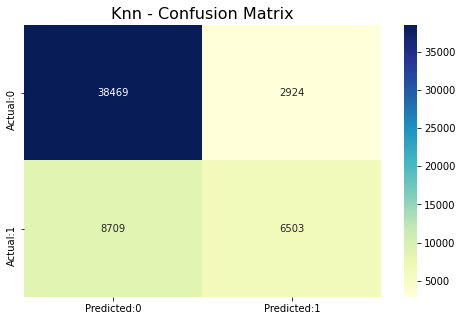

In [30]:
# Knn Classifier
knn_model = KNeighborsClassifier(n_neighbors=6)

# fit the train data
knn_model.fit(X_train,Y_train)

# Predict the labels
Y_pred = knn_model.predict(X_test)

# Accuracy Score
accuracy =accuracy_score(Y_test, Y_pred)
accuracy_list.append(accuracy)

# Classification report
print("Classification Report")
print(metrics.classification_report(Y_test, Y_pred))
print(':::::Knn accuracy score::::: {:.3f}.'.format(accuracy))

# Confusion Matrix
con_matx = multilabel_confusion_matrix(y_true=Y_test, y_pred=Y_pred, labels=[1])

confusion_matrix = pd.DataFrame(data=con_matx[0], columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(confusion_matrix, annot=True,fmt='d',cmap="YlGnBu").set_title("Knn - Confusion Matrix", fontsize=16)
plt.show()

### Neural Network

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     41393
           1       0.68      0.69      0.68     15212

    accuracy                           0.83     56605
   macro avg       0.78      0.78      0.78     56605
weighted avg       0.83      0.83      0.83     56605

:::::::Neural Network model accuracy:::::: 0.830.


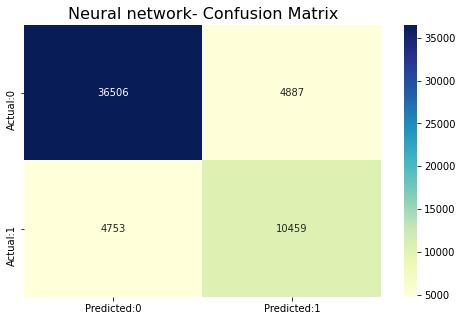

In [31]:
#Model with Neural networks
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(solver='adam', alpha=0.0001, hidden_layer_sizes=(30,30,30), activation='relu', random_state=1,
                         max_iter=200,learning_rate_init=0.001)

# Training the model with the data
mlp_model.fit(X_train,Y_train)

# Predicting the result using test data
Y_pred = mlp_model.predict(X_test)

# Accuracy score
accuracy =accuracy_score(Y_test, Y_pred)
accuracy_list.append(accuracy)

# Classification report
print("Classification Report")
print(metrics.classification_report(Y_test, Y_pred))
print(":::::::Neural Network model accuracy:::::: {:.3f}.".format(accuracy))

# Confusion Matrix
con_matx = multilabel_confusion_matrix(y_true=Y_test, y_pred=Y_pred, labels=[1])

confusion_matrix = pd.DataFrame(data=con_matx[0], columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(confusion_matrix, annot=True,fmt='d',cmap="YlGnBu").set_title("Neural network- Confusion Matrix", fontsize=16)
plt.show()

### Decision Tree Algorithm

In [32]:
# Decision tree 

# 1. Decision tree with entropy
clf_entropy = DecisionTreeClassifier( criterion='entropy',max_depth=8, random_state=100)

# Perform on train
clf_entropy.fit(X_train, Y_train)

# Predict on test
Y_pred= clf_entropy.predict(X_test)

# Accuracy score for entropy
accuracy = accuracy_score(Y_test, Y_pred)

print('Decision tree Accuracy with entropy: {:.3f}.'.format(accuracy))

Decision tree Accuracy with entropy: 0.849.


Classification Report
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     41393
           1       0.73      0.72      0.73     15212

    accuracy                           0.85     56605
   macro avg       0.81      0.81      0.81     56605
weighted avg       0.85      0.85      0.85     56605

:::::Decision tree Accuracy with gini::::: 0.852.


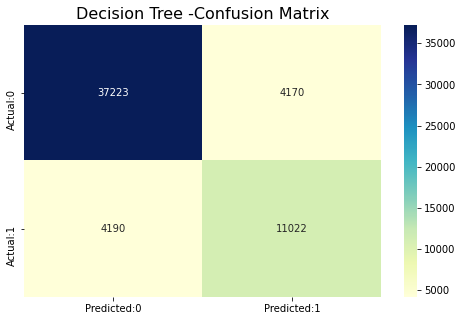

In [33]:
#2. Decision Tree classifier with gini
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=50)

# Performing on train
clf_gini.fit(X_train, Y_train)

# Predict on test labels
Y_pred= clf_gini.predict(X_test)

# Accuracy score for gini
gini_accuracy = accuracy_score(Y_test, Y_pred)
accuracy_list.append(gini_accuracy)

# Classification report
print("Classification Report")
print(metrics.classification_report(Y_test, Y_pred))

# Print accuracy_gini
print(':::::Decision tree Accuracy with gini::::: {:.3f}.'.format(gini_accuracy))


# Confusion Matrix
con_matx = multilabel_confusion_matrix(y_true=Y_test, y_pred=Y_pred, labels=[1])

confusion_matrix = pd.DataFrame(data=con_matx[0], columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(confusion_matrix, annot=True,fmt='d',cmap="YlGnBu").set_title("Decision Tree -Confusion Matrix", fontsize=16)
plt.show()

### Random Forest Algorithm

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     41393
           1       0.83      0.79      0.81     15212

    accuracy                           0.90     56605
   macro avg       0.88      0.86      0.87     56605
weighted avg       0.90      0.90      0.90     56605

:::::Random forest accuracy:::::: 0.899.


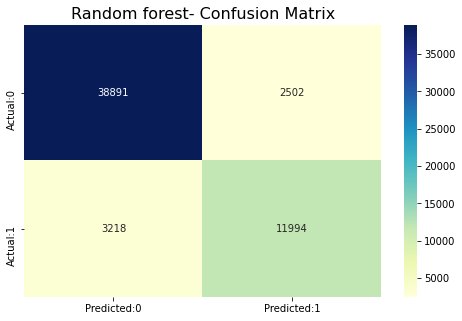

In [34]:
# Random Forest algorithm

rf_model = RandomForestClassifier()

rf_model.fit(X_train,Y_train)

Y_pred=rf_model.predict(X_test)

# Accuracy score
accuracy =accuracy_score(Y_test, Y_pred)
accuracy_list.append(accuracy)

# Classification report
print("Classification Report")
print(metrics.classification_report(Y_test, Y_pred))
print(":::::Random forest accuracy:::::: {:.3f}.".format(accuracy))

# Confusion Matrix
con_matx = multilabel_confusion_matrix(y_true=Y_test, y_pred=Y_pred, labels=[1])

confusion_matrix = pd.DataFrame(data=con_matx[0], columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(confusion_matrix, annot=True,fmt='d',cmap="YlGnBu").set_title("Random forest- Confusion Matrix", fontsize=16)
plt.show()

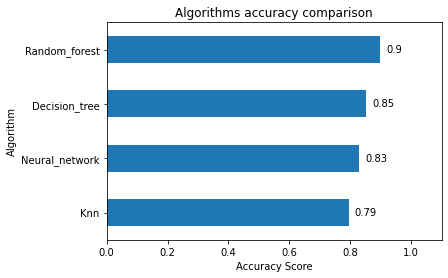

In [35]:
# Algorithm comparison graph 
algorithm_list = ['Knn','Neural_network','Decision_tree','Random_forest']

y_ticks=np.arange(len(algorithm_list))

# create a dataframe with list of algorithms and accuracy scores
acc_data=pd.DataFrame(list(zip(algorithm_list, accuracy_list)), columns=['Algorithm','Accuracy_Score']).sort_values(by=['Accuracy_Score'],ascending = True)
ax=acc_data.plot.barh('Algorithm', 'Accuracy_Score', align='center',legend=False)

for i in ax.patches:
    ax.text(i.get_width()+0.02, i.get_y()+0.2, str(round(i.get_width(),2)), fontsize=10)

plt.xlim(0,1.1)
plt.xlabel('Accuracy Score')
plt.yticks(y_ticks, acc_data['Algorithm'], rotation=0)
plt.title('Algorithms accuracy comparison')
plt.show()

### Summary:
- Loaded 'US accidents' dataset from kaggle site and imported required libraries.
- In the Data preprocessing step handled null values by replacing them with mean, mode and zero values. Dropped Turning_loop column as it has only one value False and is not useful for our analysis.
- Next, in the Data Visualization step found some intresting things like - in which states more accidents cases has been recorded, does accidents takes place more in Day or Night, on which zones these accidents are high, what are the weather conditions during accidents etc. All this information is useful in travelling better and pay attention while driving.
- Plotted correlation of variables using heatmap and selected features which are highly correlated.
- Using label encoder converted bool values to numeric and selected mountain time zone data for predicting the severity of accidents.
- Next, performed modeling by applying -Knn, XGBoost, neural_network, decision tree, and random forest algorithms. 
- Evaluated the models with accuracy scores,classification report and confusion matrix.
- Finally, plotted a graph which compares the accuracy scores of all the algorithms. From this graph we can see that the accuracy is highest for Random forest model that is 90% and Knn has the got the low accuracy score of 79%.

#### References:
https://www.kaggle.com/sobhanmoosavi/us-accidents <br>
https://ronghui-zhou.medium.com/how-you-can-avoid-car-accident-in-2020-c9626c9b6f68


